In [1]:
import matplotlib
# matplotlib.use('agg')
import numpy as np
import pandas as pd
import pickle
import gzip
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime as datetime
from random import shuffle
import math
import matplotlib.gridspec as gridspec
%matplotlib notebook


In [14]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 4.5 
fig_height = 2.5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 8,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

In [4]:
fluxfile = '/shared/users/asousa/WIPP/Thesis figures/data/AE8MAX_integral_flux_64_energies_8.dat'
d = os.listdir('/shared/users/asousa/WIPP/Thesis figures/data')

Jdata_max = np.loadtxt(fluxfile)

JL = Jdata_max[1:,0]  # L-shells in J-file
JE = Jdata_max[0,1:]  # Energies in J-file
print "J is: ", np.shape(Jdata_max)
print JL  
print JE 

fluxfile = '/shared/users/asousa/WIPP/Thesis figures/data/AE8MIN_integral_flux_64_energies_8.dat'

Jdata_min = np.loadtxt(fluxfile)


# print (pyparams['E_tot_arr'] - JE[0]*1e6) > 0)

 J is:  (81, 65)
[ 1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6
  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1
  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6
  8.7  8.8  8.9  9.   9.1]
[ 0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.16
  0.17  0.18  0.2   0.21  0.23  0.25  0.27  0.29  0.31  0.33  0.36  0.39
  0.42  0.45  0.49  0.52  0.57  0.61  0.66  0.71  0.77  0.83  0.89  0.96
  1.04  1.12  1.21  1.3   1.4   1.51  1.63  1.76  1.9   2.05  2.21  2.38
  2.57  2.77  2.99  3.23  3.48  3.75  4.05  4.37  4.71  5.08  5.48  5.91
  6.37  6.88  7.42  8.  ]


<IPython.core.display.Javascript object>


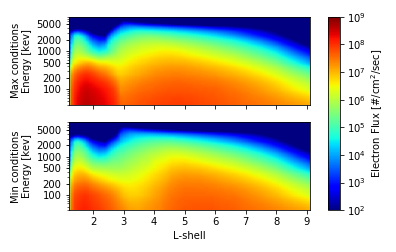

In [93]:
fig = plt.figure()
gs = gridspec.GridSpec(2,2,width_ratios=[1,0.05])
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
cax = plt.subplot(gs[:,1])
cmap = plt.cm.jet
clims = [2, 9]

ax.pcolormesh(JL_interp, JE_interp, interp_2d(Jdata_max[1:,1:]))

maxdata = np.log10(Jdata_max[1:,1:]).T
maxdata_interp = np.log10(interp_2d(Jdata_max[1:,1:])).T
p0 = ax0.pcolormesh(JL, JE*1e3, maxdata, vmin=clims[0], vmax=clims[1], cmap = cmap, shading='gouraud')

ax0.set_yscale('log')

mindata = np.log10(Jdata_min[1:,1:]).T
p1 = ax1.pcolormesh(JL, JE*1e3, mindata, vmin=clims[0], vmax=clims[1], cmap = cmap, shading='gouraud')


ax0.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ytix = np.array([100,200, 500, 1000,2000, 5000])
# yticklabels = ['100kev','500kev','1Mev','5Mev']
ax0.set_yticks(ytix)


ax1.set_yscale('log')
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_yticks(ytix)
ax1.set_xlabel('L-shell')
ax0.set_xticklabels([])
ax0.set_ylabel('Max conditions\nEnergy [kev]')
ax1.set_ylabel('Min conditions\nEnergy [kev]')

cb = plt.colorbar(p0, cax=cax)
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)
cb.set_label('$\Delta \\alpha_{RMS}$ (deg)')
cb.set_label('Electron Flux [#/cm$^2$/sec]')
gs.tight_layout(fig)


fig.savefig('AE8_fluxes.pdf')


[ 0.04        0.04219905  0.044519    0.0469665   0.04954854  0.05227254
  0.0551463   0.05817804  0.06137646  0.06475071  0.06831047  0.07206593
  0.07602785  0.08020759  0.08461711  0.08926905  0.09417673  0.09935423
  0.10481636  0.11057878  0.116658    0.12307143  0.12983745  0.13697544
  0.14450586  0.15245026  0.16083142  0.16967335  0.17900137  0.18884221
  0.19922407  0.21017668  0.22173143  0.23392142  0.24678157  0.26034872
  0.27466174  0.28976165  0.30569169  0.3224975   0.34022724  0.35893169
  0.37866445  0.39948204  0.42144411  0.44461357  0.46905681  0.49484384
  0.52204856  0.55074888  0.58102705  0.6129698   0.64666865  0.68222014
  0.71972612  0.75929404  0.80103726  0.84507537  0.89153453  0.94054786
  0.99225575  1.04680636  1.10435596  1.16506943  1.2291207   1.29669328
  1.36798076  1.44318736  1.52252854  1.60623162  1.69453638  1.78769582
  1.88597683  1.98966096  2.09904528  2.21444314  2.33618516  2.46462011
  2.60011595  2.74306085  2.89386435  3.05295847  3

<IPython.core.display.Javascript object>


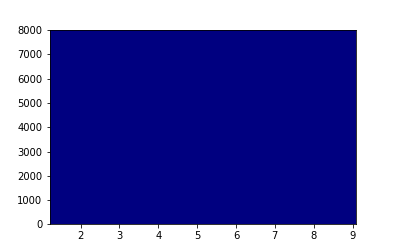

In [76]:
JE_interp = pow(10, np.linspace(np.log10(JE[0]*1e6), np.log10(JE[-1]*1e6),100))*1e-6
JL_interp = np.linspace(JL[0], JL[-1],100)
print JE_interp
print JL_interp
def interp_2d(D):
    interp = interpolate.RegularGridInterpolator([JL, JE],D, bounds_error=False, fill_value=0)
    px, py = np.meshgrid(JL_interp, JE_interp)
    pts = zip(py.ravel(), px.ravel())
    D_interp = interp(pts).reshape(len(JE_interp), len(JL_interp))
    return D_interp
    
derp = np.log10(interp_2d(Jdata_max[1:,1:]))
print np.min(derp), np.max(derp)

    
fig, ax = plt.subplots(1,1)
ax.pcolormesh(JL_interp, JE_interp, derp.T, vmin=2, vmax=9)
# Jdata_max_int = interp_2d(Jdata_max[1:,1:])

In [82]:
print maxdata

[[        nan         nan         nan ...,  0.69839549  0.66491484
   0.61668576]
 [        nan         nan         nan ...,  0.68913529  0.65402244
   0.60293601]
 [        nan         nan         nan ...,  0.67973714  0.64292941
   0.58885788]
 ..., 
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]]
